We will plot a invariant mass distribution from a LHE input file.

First, some basic imports.

In [1]:
import pylhe
import rootnotes
import ROOT
import math

Prepare a histogram and a function to calculate the invariant mass of two particles.

In [2]:
h = ROOT.TH1F("invmass", "Invariant Mass of Final State", 150, 25, 175)
h.SetFillColor(38)

In [4]:
def invariant_mass(p1, p2):
    return math.sqrt(
        sum(
            (1 if mu == "e" else -1) * (getattr(p1, mu) + getattr(p2, mu)) ** 2
            for mu in ["e", "px", "py", "pz"]
        )
    )

Use the generator provided by pylhe to read the events.

In [6]:
for e in pylhe.readLHE("./PROC_sm_1/Events/run_01/unweighted_events.lhe"):
    h.Fill(invariant_mass(e.particles[-1], e.particles[-2]), e.eventinfo.weight)

Finally, prepare a canvas and plot the histogram on it.

In [7]:
c = rootnotes.default_canvas()
c.SetLogy()

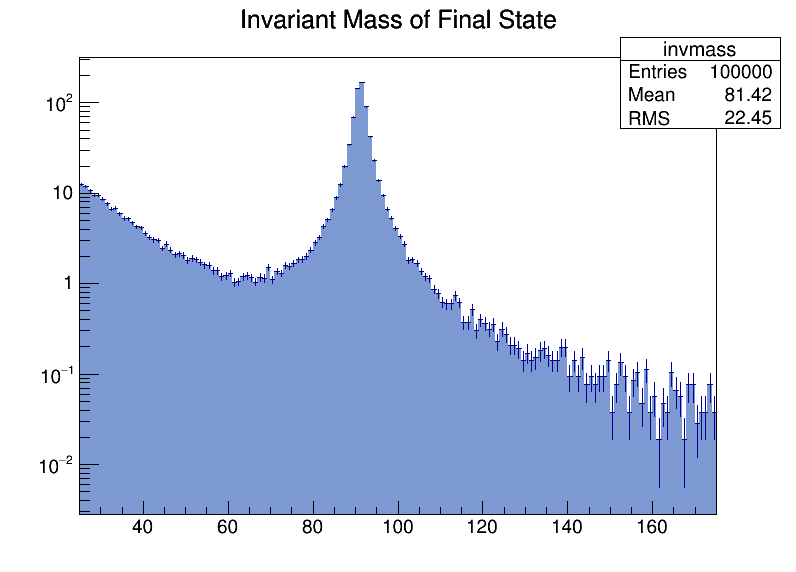

In [8]:
h.Draw("bar")
c

In [9]:
import itertools
from wand.image import Image as WImage

events = pylhe.readLHE("./PROC_sm_1/Events/run_01/unweighted_events.lhe")
for i, e in enumerate(itertools.islice(events, 0, 2)):
    filename = f"event{i}.pdf"
    pylhe.visualize(e, filename)

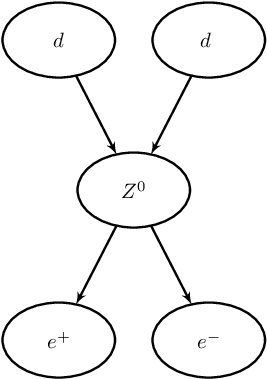

In [10]:
WImage(filename="event0.pdf", resolution=150)

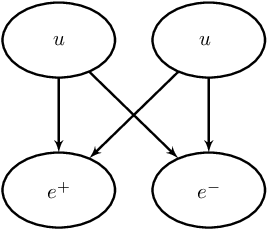

In [11]:
WImage(filename="event1.pdf", resolution=150)